In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [9]:
dfg = pd.read_csv('wat-r1-good.csv')
dfm = pd.read_csv('wat-r1-mal.csv')

In [10]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1
4,86,4,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,9,26,2,6,1


In [11]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,1,58,59,12,12,0
1,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,56,59,11,12,0
2,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,23,59,10,12,0
3,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,20,59,9,12,0
4,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,18,59,8,12,0


In [12]:
df = dfg.append(dfm, ignore_index=True)

In [13]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1
4,86,4,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,9,26,2,6,1


In [14]:
df = df.sort_values('time')

In [15]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
50112,7,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,1,58,59,12,12,0
50113,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,56,59,11,12,0
0,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
50114,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,23,59,10,12,0
1,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
2,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,11,26,4,6,1
50115,84,4,2,0x1dc0,3,1,1,4,16,18,2,0,0,74,0,20,59,9,12,0
50116,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,18,59,8,12,0
3,85,4,2,0x1dc0,3,2,1,4,16,18,2,0,0,74,0,10,26,3,6,1
4,86,4,2,0x1dc0,3,3,1,4,16,18,2,0,0,74,0,9,26,2,6,1


In [17]:
df.to_csv('wat-r1-pkt-small.csv',index=False)

In [18]:
df = pd.read_csv("wat-r1-pkt-small.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,7,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,1,58,59,12,12,0
1,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,56,59,11,12,0
2,11,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
3,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,23,59,10,12,0
4,83,4,2,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103585,3251376,2,4,0x1152c0,4,1,1,2,8,0,0,27,11,3251361,10026,22,26,5,6,1
103586,3251383,2,4,0x1152c0,4,2,1,2,8,0,0,27,11,3251361,10026,17,26,4,6,1
103587,3251390,2,4,0x1152c0,4,3,1,2,8,0,0,27,11,3251361,10026,11,26,3,6,1
103588,3251397,2,4,0x1152c0,4,4,2,2,8,0,0,27,11,3251361,10026,4,26,2,6,1


In [19]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.048900,0.140728,0.021898,0.012431,-0.019608,-0.056430,-0.066862,-0.096541,-0.172255,0.085060,0.093056,1.000000,0.981119,-0.023431,-0.086237,-0.165758,-0.209341,0.105667
outport,0.048900,1.000000,-0.385245,-0.225436,0.013052,-0.020600,0.697159,0.699191,0.216653,-0.027973,-0.593015,-0.171388,0.048905,0.050381,-0.032384,-0.016172,-0.097989,-0.048840,0.040916
inport,0.140728,-0.385245,1.000000,-0.009313,-0.015640,0.024685,-0.612553,-0.693686,-0.775785,-0.395407,0.701194,0.584997,0.140723,0.144734,0.154753,0.065584,-0.119944,-0.213443,0.057782
packet_type,0.021898,-0.225436,-0.009313,1.000000,0.310000,-0.489278,-0.210469,-0.240578,0.107903,0.062006,0.032793,-0.078506,0.021900,0.023319,-0.010029,-0.084900,0.056685,-0.007822,0.008716
flit_id,0.012431,0.013052,-0.015640,0.310000,1.000000,0.074966,0.145657,0.101464,0.010473,0.001039,-0.065904,-0.029619,0.012427,0.012103,-0.053836,0.022321,-0.049430,0.010577,0.001809
flit_type,-0.019608,-0.020600,0.024685,-0.489278,0.074966,1.000000,-0.229893,-0.160143,-0.016531,-0.001639,0.104018,0.046749,-0.019613,-0.019103,-0.063222,0.079302,-0.053812,0.042347,-0.002855
vnet,-0.056430,0.697159,-0.612553,-0.210469,0.145657,-0.229893,1.000000,0.974987,0.592690,0.337922,-0.869454,-0.492859,-0.056424,-0.060889,-0.126541,-0.027660,0.027125,0.086248,-0.024384
vc,-0.066862,0.699191,-0.693686,-0.240578,0.101464,-0.160143,0.974987,1.000000,0.611682,0.313148,-0.874760,-0.511121,-0.066856,-0.071678,-0.142635,-0.046569,0.028146,0.104956,-0.028106
src_ni,-0.096541,0.216653,-0.775785,0.107903,0.010473,-0.016531,0.592690,0.611682,1.000000,0.652821,-0.753169,-0.705808,-0.096537,-0.099959,-0.211449,-0.053846,0.130834,0.169686,-0.035069
src_router,-0.172255,-0.027973,-0.395407,0.062006,0.001039,-0.001639,0.337922,0.313148,0.652821,1.000000,-0.427131,-0.367709,-0.172254,-0.170997,-0.010680,0.216223,0.186354,0.204290,-0.097458


In [20]:
train_X = df.drop(columns=['packet_address','time','target'])

In [21]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max
0,1,0,0,0,3,2,8,1,1,29,13,3,1,58,59,12,12
1,2,4,0,0,3,2,8,0,0,23,7,3,0,56,59,11,12
2,2,4,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6
3,4,2,3,0,0,4,16,18,2,0,0,74,0,23,59,10,12
4,4,2,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103585,2,4,4,1,1,2,8,0,0,27,11,3251361,10026,22,26,5,6
103586,2,4,4,2,1,2,8,0,0,27,11,3251361,10026,17,26,4,6
103587,2,4,4,3,1,2,8,0,0,27,11,3251361,10026,11,26,3,6
103588,2,4,4,4,2,2,8,0,0,27,11,3251361,10026,4,26,2,6


In [22]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.25,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.000000,0.000097,0.564356,0.557692,0.379310,0.379310
1,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.000000,0.544554,0.557692,0.344828,0.379310
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.000000,0.000000,0.237624,0.240385,0.172414,0.172414
3,1.00,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.000000,0.000000,0.000022,0.000000,0.217822,0.557692,0.310345,0.379310
4,1.00,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.000000,0.000000,0.000022,0.000000,0.108911,0.240385,0.137931,0.172414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103585,0.50,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,1.000000,0.973398,0.207921,0.240385,0.137931,0.172414
103586,0.50,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,1.000000,0.973398,0.158416,0.240385,0.103448,0.172414
103587,0.50,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,1.000000,0.973398,0.099010,0.240385,0.068966,0.172414
103588,0.50,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.000000,0.000000,0.870968,0.733333,1.000000,0.973398,0.029703,0.240385,0.034483,0.172414


In [23]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,target
0,1.000000,-0.385245,-0.225436,0.013052,-0.020600,0.697159,0.699191,0.216653,-0.027973,-0.593015,-0.171388,0.048905,0.050381,-0.032384,-0.016172,-0.097989,-0.048840,0.040916
1,-0.385245,1.000000,-0.009313,-0.015640,0.024685,-0.612553,-0.693686,-0.775785,-0.395407,0.701194,0.584997,0.140723,0.144734,0.154753,0.065584,-0.119944,-0.213443,0.057782
2,-0.225436,-0.009313,1.000000,0.310000,-0.489278,-0.210469,-0.240578,0.107903,0.062006,0.032793,-0.078506,0.021900,0.023319,-0.010029,-0.084900,0.056685,-0.007822,0.008716
3,0.013052,-0.015640,0.310000,1.000000,0.074966,0.145657,0.101464,0.010473,0.001039,-0.065904,-0.029619,0.012427,0.012103,-0.053836,0.022321,-0.049430,0.010577,0.001809
4,-0.020600,0.024685,-0.489278,0.074966,1.000000,-0.229893,-0.160143,-0.016531,-0.001639,0.104018,0.046749,-0.019613,-0.019103,-0.063222,0.079302,-0.053812,0.042347,-0.002855
5,0.697159,-0.612553,-0.210469,0.145657,-0.229893,1.000000,0.974987,0.592690,0.337922,-0.869454,-0.492859,-0.056424,-0.060889,-0.126541,-0.027660,0.027125,0.086248,-0.024384
6,0.699191,-0.693686,-0.240578,0.101464,-0.160143,0.974987,1.000000,0.611682,0.313148,-0.874760,-0.511121,-0.066856,-0.071678,-0.142635,-0.046569,0.028146,0.104956,-0.028106
7,0.216653,-0.775785,0.107903,0.010473,-0.016531,0.592690,0.611682,1.000000,0.652821,-0.753169,-0.705808,-0.096537,-0.099959,-0.211449,-0.053846,0.130834,0.169686,-0.035069
8,-0.027973,-0.395407,0.062006,0.001039,-0.001639,0.337922,0.313148,0.652821,1.000000,-0.427131,-0.367709,-0.172254,-0.170997,-0.010680,0.216223,0.186354,0.204290,-0.097458
9,-0.593015,0.701194,0.032793,-0.065904,0.104018,-0.869454,-0.874760,-0.753169,-0.427131,1.000000,0.805174,0.085054,0.089955,0.238122,0.127277,-0.082321,-0.132585,0.026511


In [24]:
train_Y = df['target']

In [25]:
train_Y

0         0
1         0
2         1
3         0
4         1
         ..
103585    1
103586    1
103587    1
103588    1
103589    1
Name: target, Length: 103590, dtype: int64

In [26]:
pca = PCA(0.95)

In [27]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.49925803,  0.78994211, -0.75139358, ...,  0.90486036,
         0.19051529, -0.25515995],
       [-0.66104168,  0.56439051, -0.93074605, ...,  0.06847908,
         0.41748353,  0.25402911],
       [-0.65467438,  0.52053565, -0.89977648, ..., -0.19410641,
         0.10546591, -0.00441896],
       ...,
       [-0.81041082, -0.78216205,  0.21094851, ...,  0.21113696,
        -0.01740848, -0.01907308],
       [-0.81549354, -0.78164022,  0.32360823, ...,  0.16884413,
        -0.04747524, -0.0246653 ],
       [-0.81549666, -0.74621537, -0.55208767, ...,  0.02581961,
         0.16472932, -0.22071131]])

In [29]:
pca.explained_variance_ratio_

array([0.44846803, 0.13124823, 0.09741676, 0.09388752, 0.07701801,
       0.04240014, 0.03608904, 0.02814165])

In [30]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

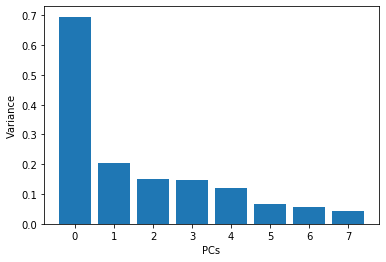

In [31]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [32]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7
0,-0.499258,0.789942,-0.751394,-0.131451,0.604130,0.904860,0.190515,-0.255160
1,-0.661042,0.564391,-0.930746,0.092463,0.471530,0.068479,0.417484,0.254029
2,-0.654674,0.520536,-0.899776,0.068161,0.468518,-0.194106,0.105466,-0.004419
3,1.127749,0.431164,-0.605589,0.039720,-0.546043,-0.022773,0.326959,0.309579
4,1.128055,0.386967,-0.586918,0.023030,-0.556859,-0.235497,0.058255,0.089204
...,...,...,...,...,...,...,...,...
103585,-0.833778,-0.746015,-0.082498,-0.115692,-0.161320,0.234005,0.023377,0.040710
103586,-0.822246,-0.764097,0.063918,0.070392,-0.109333,0.223817,0.004067,0.011770
103587,-0.810411,-0.782162,0.210949,0.256096,-0.056955,0.211137,-0.017408,-0.019073
103588,-0.815494,-0.781640,0.323608,0.442864,0.289429,0.168844,-0.047475,-0.024665


In [33]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,target
0,-0.499258,0.789942,-0.751394,-0.131451,0.604130,0.904860,0.190515,-0.255160,0
1,-0.661042,0.564391,-0.930746,0.092463,0.471530,0.068479,0.417484,0.254029,0
2,-0.654674,0.520536,-0.899776,0.068161,0.468518,-0.194106,0.105466,-0.004419,1
3,1.127749,0.431164,-0.605589,0.039720,-0.546043,-0.022773,0.326959,0.309579,0
4,1.128055,0.386967,-0.586918,0.023030,-0.556859,-0.235497,0.058255,0.089204,1
...,...,...,...,...,...,...,...,...,...
103585,-0.833778,-0.746015,-0.082498,-0.115692,-0.161320,0.234005,0.023377,0.040710,1
103586,-0.822246,-0.764097,0.063918,0.070392,-0.109333,0.223817,0.004067,0.011770,1
103587,-0.810411,-0.782162,0.210949,0.256096,-0.056955,0.211137,-0.017408,-0.019073,1
103588,-0.815494,-0.781640,0.323608,0.442864,0.289429,0.168844,-0.047475,-0.024665,1


In [34]:
final_df.corr()

,0,1,2,3,4,5,6,7,target
0,1.000000e+00,1.512507e-14,-4.853898e-17,-2.392602e-15,3.620699e-15,1.024140e-14,-1.610047e-14,7.642767e-15,-0.029663
1,1.512507e-14,1.000000e+00,2.192749e-15,-1.684525e-15,-1.907884e-15,-8.676056e-15,1.054298e-14,-1.299712e-15,-0.080657
2,-4.853898e-17,2.192749e-15,1.000000e+00,-3.576174e-16,1.432225e-15,-1.091524e-14,1.065813e-14,-9.467379e-16,-0.010780
3,-2.392602e-15,-1.684525e-15,-3.576174e-16,1.000000e+00,1.775748e-15,7.075782e-15,-7.842745e-15,2.114218e-15,0.008341
4,3.620699e-15,-1.907884e-15,1.432225e-15,1.775748e-15,1.000000e+00,7.598792e-16,-1.313348e-15,8.868422e-16,-0.007425
5,1.024140e-14,-8.676056e-15,-1.091524e-14,7.075782e-15,7.598792e-16,1.000000e+00,-5.949239e-15,9.227193e-15,-0.088744
6,-1.610047e-14,1.054298e-14,1.065813e-14,-7.842745e-15,-1.313348e-15,-5.949239e-15,1.000000e+00,-1.050641e-14,-0.117727
7,7.642767e-15,-1.299712e-15,-9.467379e-16,2.114218e-15,8.868422e-16,9.227193e-15,-1.050641e-14,1.000000e+00,-0.023633
target,-2.966328e-02,-8.065694e-02,-1.078012e-02,8.340565e-03,-7.425027e-03,-8.874359e-02,-1.177273e-01,-2.363257e-02,1.000000


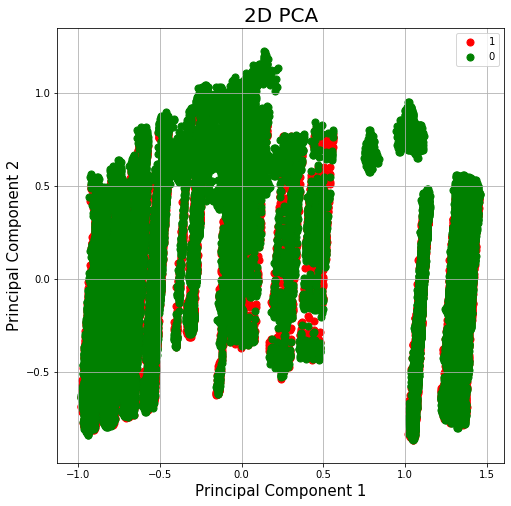

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [36]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,1,0,0,0,3,2,8,1,1,29,13,3,1,58,59,12,12,0
1,2,4,0,0,3,2,8,0,0,23,7,3,0,56,59,11,12,0
2,2,4,0,0,3,2,8,0,0,23,7,3,0,25,26,6,6,1
3,4,2,3,0,0,4,16,18,2,0,0,74,0,23,59,10,12,0
4,4,2,3,0,0,4,16,18,2,0,0,74,0,12,26,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103585,2,4,4,1,1,2,8,0,0,27,11,3251361,10026,22,26,5,6,1
103586,2,4,4,2,1,2,8,0,0,27,11,3251361,10026,17,26,4,6,1
103587,2,4,4,3,1,2,8,0,0,27,11,3251361,10026,11,26,3,6,1
103588,2,4,4,4,2,2,8,0,0,27,11,3251361,10026,4,26,2,6,1


In [37]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [38]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [39]:
seed = 7
np.random.seed(seed)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(principal_df, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [41]:
model = Sequential()

In [42]:
n_cols = principal_df.shape[1]
n_cols

8

In [43]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [48]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Train on 56352 samples, validate on 14089 samples
Epoch 1/10
56352/56352 [==============================] - 5s 84us/step - loss: 0.2190 - accuracy: 0.6026 - val_loss: 0.2225 - val_accuracy: 0.5899
Epoch 2/10
56352/56352 [==============================] - 5s 84us/step - loss: 0.2189 - accuracy: 0.6015 - val_loss: 0.2201 - val_accuracy: 0.5927
Epoch 3/10
56352/56352 [==============================] - 5s 97us/step - loss: 0.2188 - accuracy: 0.6039 - val_loss: 0.2211 - val_accuracy: 0.5859
Epoch 4/10
56352/56352 [==============================] - 5s 88us/step - loss: 0.2187 - accuracy: 0.6035 - val_loss: 0.2203 - val_accuracy: 0.5924
Epoch 5/10
56352/56352 [==============================] - 5s 85us/step - loss: 0.2188 - accuracy: 0.6012 - val_loss: 0.2196 - val_accuracy: 0.5951
Epoch 6/10
56352/56352 [==============================] - 5s 94us/step - loss: 0.2187 - accuracy: 0.6034 - val_loss: 0.2203 - val_accuracy: 0.5942
Epoch 7/10
56352/56352 [==============================] - 6s 102us/s

In [49]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [50]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 59.24%


In [57]:
dff = pd.read_csv('wat-r1-pkt-small.csv',nrows=500)

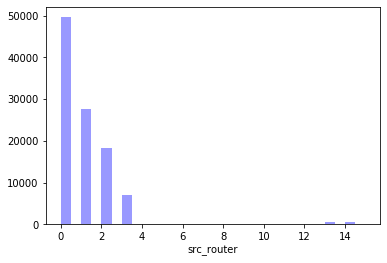

In [58]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

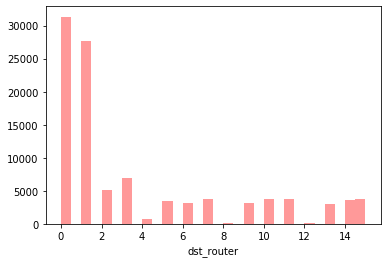

In [59]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

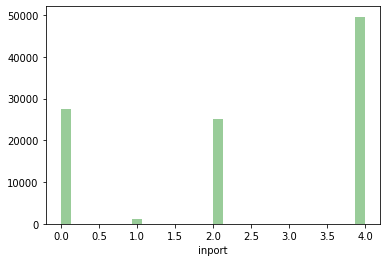

In [60]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

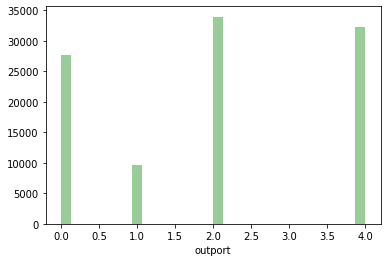

In [61]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

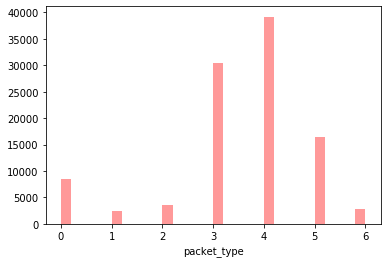

In [62]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')